In [1]:
import numpy as np
import pandas as pd
from pandas.io import sql
import sqlalchemy as sa
import yaml as yml
import json
import demjson
get_ipython().magic(u'matplotlib inline')
import scipy.stats as ssp
from matplotlib import pyplot as plt
from __future__ import division

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("./BFF_STUDYI_RAW_ANSWERS.csv")

In [4]:

df = df.convert_objects(convert_numeric=True)


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [5]:
df = df.drop("Unnamed: 0",axis=1)

In [6]:
df.head()

,uniqueid,assignmentid,workerid,hitid,ipaddress,browser,platform,language,cond,counterbalance,codeversion,beginhit,beginexp,endhit,bonus,status,datastring
0,A10GAT1S9UVEYQ:3G2UL9A02DF5FMK5NRRPHB0XM9T67K,3G2UL9A02DF5FMK5NRRPHB0XM9T67K,A10GAT1S9UVEYQ,3FVBZG9CLJF58G6889SIA3KHB1NH0J,127.13.130.129,chrome,windows,UNKNOWN,0,0,1,2014-10-18 18:45:40,2014-10-18 18:46:19,2014-10-18 18:59:59,0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
1,A10VQSMGPJFSMU:3SUWZRL0MYEQO1ZFAZ5VNLSE8WX6E6,3SUWZRL0MYEQO1ZFAZ5VNLSE8WX6E6,A10VQSMGPJFSMU,3FVBZG9CLJF58G6889SIA3KHB1NH0J,127.13.130.129,chrome,windows,UNKNOWN,0,0,1,2014-10-18 18:47:40,2014-10-18 18:48:16,2014-10-18 19:01:32,0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
2,A1153ZIEQX0ZJ8:3DEL4X4EL6M1DL02BNQFU1XENC1YX7,3DEL4X4EL6M1DL02BNQFU1XENC1YX7,A1153ZIEQX0ZJ8,3FVBZG9CLJF58G6889SIA3KHB1NH0J,127.13.130.129,chrome,windows,UNKNOWN,0,0,1,2014-10-18 18:47:39,2014-10-18 18:50:16,2014-10-18 18:58:10,0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
3,A115PR5C0O03UJ:37C0GNLMHF4LWVLFE4UBH3AT8KXD6L,37C0GNLMHF4LWVLFE4UBH3AT8KXD6L,A115PR5C0O03UJ,3FVBZG9CLJF58G6889SIA3KHB1NH0J,127.13.130.129,safari,macos,UNKNOWN,0,0,1,2014-10-18 19:02:22,2014-10-18 19:02:59,2014-10-18 19:12:03,0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
4,A12420CA7Q9ET0:3SB5N7Y3O35TU49RE5F2EN3Z89R0GH,3SB5N7Y3O35TU49RE5F2EN3Z89R0GH,A12420CA7Q9ET0,3FVBZG9CLJF58G6889SIA3KHB1NH0J,127.13.130.129,chrome,windows,UNKNOWN,0,0,1,2014-10-18 19:33:56,2014-10-18 19:34:10,2014-10-18 19:41:09,0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."


In [7]:
len(df)

434

In [8]:
#df.to_csv("STUDY_1_BFASOPG_RAW.csv")

In [9]:
def takestring(row):
    #print json.loads(row['datastring'])
    try:
        d = json.loads(row['datastring'])
    except:
        print row
    else:
   # print jj
        j= d['data']
        for a in j:
            b = a['trialdata']
            if 'answer' in b:
                item_id = b['id']
                rawanswer = b['answer']
                row[item_id] = rawanswer
    #print row
        return pd.Series(row)


In [10]:
df=df[df['status']==4]


In [11]:
len(df)

434

In [12]:
df = df.apply(takestring,axis=1)
df = df.convert_objects(convert_numeric=True)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [18]:
len(df)

334

In [13]:
df = df[df['BF-F1+'].notnull()]


In [14]:
len(df)

434

In [15]:
print df.columns.tolist()[:-17][-26:]
print len(df.columns.tolist()[:-17][-26:])

[u'IE_19+', u'IE_20+', u'IE_21+', u'IE_22-', u'IE_23-', u'IE_24+', u'IE_25-', u'IE_26-', u'OPG_10+', u'OPG_11-', u'OPG_12+', u'OPG_13+', u'OPG_14+', u'OPG_15+', u'OPG_16+', u'OPG_17-', u'OPG_18-', u'OPG_9+', u'PBR_1+', u'PBR_2-', u'PBR_3+', u'PBR_4+', u'PBR_5+', u'PBR_6-', u'PBR_7-', u'PBR_8-']
26


In [16]:
df2 = df.copy(True)

In [17]:
df2.head()

,BF-F1+,BF-F10+,BF-F100+,BF-F101+,BF-F102+,BF-F11+,BF-F12+,BF-F13+,BF-F14+,BF-F15+,BF-F16+,BF-F17-,BF-F18+,BF-F19-,BF-F2+,BF-F20+,BF-F21+,BF-F22+,BF-F23+,BF-F24+,BF-F25+,BF-F26+,BF-F27+,BF-F28-,BF-F29+,BF-F3+,BF-F30+,BF-F31+,BF-F32+,BF-F33+,BF-F34-,BF-F35-,BF-F36-,BF-F37-,BF-F38-,BF-F39-,BF-F4+,BF-F40+,BF-F41+,BF-F42+,BF-F43+,BF-F44-,BF-F45-,BF-F46-,BF-F47-,BF-F48-,BF-F49-,BF-F5+,BF-F50+,BF-F51-,BF-F52+,BF-F53+,BF-F54+,BF-F55+,BF-F56-,BF-F57-,BF-F58+,BF-F59+,BF-F6-,BF-F60-,BF-F61+,BF-F62+,BF-F63+,BF-F64+,BF-F65+,BF-F66+,BF-F67-,BF-F68-,BF-F69+,BF-F7+,BF-F70-,BF-F71+,BF-F72+,BF-F73+,BF-F74+,BF-F75+,BF-F76+,BF-F77+,BF-F78-,BF-F79-,BF-F8+,BF-F80-,BF-F81-,BF-F82+,BF-F83-,BF-F84+,BF-F85+,BF-F86+,BF-F87+,BF-F88+,BF-F89+,BF-F9+,BF-F90-,BF-F91-,BF-F92+,BF-F93+,BF-F94+,BF-F95+,BF-F96+,BF-F97+,BF-F98+,BF-F99+,IE_19+,IE_20+,IE_21+,IE_22-,IE_23-,IE_24+,IE_25-,IE_26-,OPG_10+,OPG_11-,OPG_12+,OPG_13+,OPG_14+,OPG_15+,OPG_16+,OPG_17-,OPG_18-,OPG_9+,PBR_1+,PBR_2-,PBR_3+,PBR_4+,PBR_5+,PBR_6-,PBR_7-,PBR_8-,assignmentid,beginexp,beginhit,bonus,browser,codeversion,cond,counterbalance,datastring,endhit,hitid,ipaddress,language,platform,status,uniqueid,workerid
0,34.47,87.93,59.34,31.83,26.91,82.65,90.30,88.21,24.54,92.76,29.10,13.43,90.76,50.00,50.00,89.57,88.93,65.98,77.73,31.56,54.69,56.33,52.69,14.21,11.25,8.52,10.06,50.00,88.84,10.79,10.61,17.99,76.18,11.07,50.00,45.31,52.23,22.54,11.52,73.18,88.75,50.00,74.36,29.83,66.89,91.85,70.90,8.97,9.34,77.82,77.46,93.94,39.03,39.03,74.00,50.00,10.15,44.03,83.20,87.93,80.46,12.34,66.71,11.98,8.70,24.54,91.03,78.55,62.16,8.70,83.97,20.63,10.43,9.15,10.34,26.82,22.45,9.70,10.88,50.00,12.52,9.61,29.01,94.49,7.42,10.34,5.60,10.97,75.00,74.09,6.24,57.24,50.00,37.02,29.19,78.19,63.25,74.73,72.27,50.00,73.91,4.42,50.00,81.19,90.57,84.11,77.14,87.11,12.25,9.34,38.93,77.55,14.44,16.80,71.17,75.00,16.71,10.25,89.21,66.26,92.12,50.00,90.03,89.39,91.21,10.97,9.79,56.42,3G2UL9A02DF5FMK5NRRPHB0XM9T67K,2014-10-18 18:46:19,2014-10-18 18:45:40,0,chrome,1,0,0,"{""condition"":0,""counterbalance"":0,""assignmentI...",2014-10-18 18:59:59,3FVBZG9CLJF58G6889SIA3KHB1NH0J,127.13.130.129,UNKNOWN,windows,4,A10GAT1S9UVEYQ:3G2UL9A02DF5FMK5NRRPHB0XM9T67K,A10GAT1S9UVEYQ
1,9.70,32.01,1.68,99.32,59.24,8.52,63.71,28.46,2.14,16.07,23.91,90.85,27.09,50.00,21.17,19.90,90.85,73.27,89.94,97.72,82.38,86.93,98.50,1.68,29.74,54.96,76.73,63.80,76.46,69.90,53.51,22.09,25.27,1.64,5.15,84.11,51.95,93.21,98.77,83.56,71.36,28.64,28.46,79.46,19.99,7.06,28.83,17.90,1.50,6.60,27.00,51.59,92.12,73.54,6.97,31.92,40.57,32.19,90.30,5.33,77.09,50.00,78.28,70.45,94.31,90.12,19.63,80.74,85.93,25.18,19.08,67.44,60.25,60.43,62.80,58.61,73.63,70.99,50.00,50.00,2.23,56.51,28.37,22.63,20.08,87.93,93.53,50.00,86.02,50.00,41.03,20.17,65.44,74.18,8.97,50.00,99.50,68.35,75.82,69.99,34.93,10.79,90.57,90.30,50.00,18.99,10.25,76.00,40.12,0.68,90.21,10.15,80.83,68.44,89.66,98.86,50.05,55.51,74.91,9.52,78.10,39.30,79.55,56.92,65.80,29.01,24.00,10.06,3SUWZRL0MYEQO1ZFAZ5VNLSE8WX6E6,2014-10-18 18:48:16,2014-10-18 18:47:40,0,chrome,1,0,0,"{""condition"":0,""counterbalance"":0,""assignmentI...",2014-10-18 19:01:32,3FVBZG9CLJF58G6889SIA3KHB1NH0J,127.13.130.129,UNKNOWN,windows,4,A10VQSMGPJFSMU:3SUWZRL0MYEQO1ZFAZ5VNLSE8WX6E6,A10VQSMGPJFSMU
2,38.70,90.31,67.09,98.55,35.02,94.49,98.61,80.23,69.99,73.78,50.00,69.65,33.02,68.43,49.89,30.57,33.46,45.71,20.77,55.85,28.56,57.52,50.00,67.93,0.00,78.56,24.55,50.00,77.12,85.02,0.06,6.74,0.39,0.00,10.19,50.00,64.48,59.30,50.00,50.00,50.00,91.37,81.24,68.32,30.18,63.20,66.54,65.14,31.51,45.27,26.67,76.34,10.86,40.70,78.34,74.11,35.97,50.00,57.74,50.67,43.93,67.76,90.26,77.17,74.78,50.00,24.44,21.88,60.47,77.90,62.08,60.19,79.79,69.65,0.00,0.00,25.11,67.82,59.63,67.54,50.00,23.44,9.63,65.09,75.67,29.68,68.65,70.32,65.76,33.24,50.00,60.47,57.96,50.00,1.34,49.89,14.87,74.67,70.10,42.48,67.43,10.97,82.68,89.70,50.00,50.00,9.41,58.96,50.84,78.56,77.73,21.99,11.97,79.90,50.00,49.83,18.99,28.90,83.35,50.00,89.59,31.12,90.37,88.59,90.92,17.54,19.65,7.96

In [18]:
def split_and_reverse(df):
    ls_col = df.columns.values.tolist()
    ls_col.sort()
    r_ls_col = ls_col[:-17] #the restricted list of columns #MAKE SURE THIS PARAM IS RIGHT
    bff_cols = ['workerid']
    opg_cols = ['workerid']
    bff_cols.extend(r_ls_col[:-26])
    opg_cols.extend(r_ls_col[-26:])

    print bff_cols[0:10]
    print '\n'
    print opg_cols
    print '\n'
    BffDf = df[bff_cols]
    OpgDf = df[opg_cols]

   # df['ref'] = pd.Series([100.0 for x in range(len(BffDf['workerId']))])
   # print df['ref'].tail()



    for label in bff_cols:
        #print label
        if label[-1]=='-': #if item is reversed:
            
            BffDf[label] = 100- BffDf[label].astype(float)



        elif label[-1]=='+': #label = workerID
            pass
        else:
            BffDf.loc[label] = df['workerid']

    print OpgDf['OPG_16+'].loc[1]
    print type(OpgDf['OPG_16+'].loc[1])

    OpgDf['OPG_16+'] = 100-2*abs(OpgDf['OPG_16+']-50)
    OpgDf['IE_21+'] = 100-2*abs(OpgDf['IE_21+']-50)


    OpgDf['PBR_1+'] = ((OpgDf['PBR_1+']-50)*1.1)+50
    OpgDf['PBR_3+'] = ((OpgDf['PBR_3+']-50)*1.1)+50
    OpgDf['OPG_15+'] = ((OpgDf['OPG_15+']-50)*1.1)+50

    OpgDf['PBR_1+'] = OpgDf['PBR_1+'].apply(lambda x: 100 if x>100 else x)
    OpgDf['PBR_3+'] = OpgDf['PBR_3+'].apply(lambda x: 100 if x>100 else x)
    OpgDf['OPG_15+'] = OpgDf['OPG_15+'].apply(lambda x: 100 if x>100 else x)
    
    OpgDf['PBR_1+'] = OpgDf['PBR_1+'].apply(lambda x: 0 if x<0 else x)
    OpgDf['PBR_3+'] = OpgDf['PBR_3+'].apply(lambda x: 0 if x<0 else x)
    OpgDf['OPG_15+'] = OpgDf['OPG_15+'].apply(lambda x: 0 if x<0 else x)

    for label in OpgDf:
        if label[-1]=='-':
            OpgDf[label]=100-OpgDf[label].astype(float)
        elif label[-1]=='+':
            pass
        else:
            OpgDf[label] = df['workerid']

    ##Now, change neuroticism to stability
    #for label in Neuroticism:
       # BfasDf[label] = 100-BfasDf[label].astype(float) #will take care of Neuroticism later

    #BffDf.sort(axis=1,inplace=True,ascending=True)
    #OpgDf.sort(axis=1,inplace=True,ascending=True)

    return BffDf,OpgDf


In [19]:
bff,opg = split_and_reverse(df)

['workerid', u'BF-F1+', u'BF-F10+', u'BF-F100+', u'BF-F101+', u'BF-F102+', u'BF-F11+', u'BF-F12+', u'BF-F13+', u'BF-F14+']


['workerid', u'IE_19+', u'IE_20+', u'IE_21+', u'IE_22-', u'IE_23-', u'IE_24+', u'IE_25-', u'IE_26-', u'OPG_10+', u'OPG_11-', u'OPG_12+', u'OPG_13+', u'OPG_14+', u'OPG_15+', u'OPG_16+', u'OPG_17-', u'OPG_18-', u'OPG_9+', u'PBR_1+', u'PBR_2-', u'PBR_3+', u'PBR_4+', u'PBR_5+', u'PBR_6-', u'PBR_7-', u'PBR_8-']


50.05

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/


<type 'numpy.float64'>


In [20]:
print len(bff)
print len(opg)

435
434


In [21]:
bff = bff.drop('workerid')

In [ ]:
#working towards: OPG -- Personality item correlation

In [22]:
correct_order_opg = [#'workerid',
 'PBR_1+',
 'PBR_2-',
 'PBR_3+',
 'PBR_4+',
 'PBR_5+',
 'PBR_6-',
 'PBR_7-',
 'PBR_8-',
 'OPG_9+',
 'OPG_10+',
 'OPG_11-',
 'OPG_12+',
 'OPG_13+',
 'OPG_14+',
 'OPG_15+',
 'OPG_16+',
 'OPG_17-',
 'OPG_18-',
 'IE_19+',
 'IE_20+',
 'IE_21+',
 'IE_22-',
 'IE_23-',
 'IE_24+',
 'IE_25-',
 'IE_26-',
]

In [23]:
subset = ['PBR_1+', #From Factor analysis - G loadings from a five factor solution of less than 20 are dropped
 'PBR_2-',
 'PBR_3+',
 'PBR_4+',
 'PBR_5+',
 'PBR_6-',
 'PBR_7-',
 'OPG_10+',
 'OPG_12+',
 'OPG_13+',
 'OPG_14+',
 'OPG_15+',
 'OPG_16+',
 'IE_19+',
 'IE_20+',
 'IE_21+',
 'IE_22-',
 'IE_24+',
 'IE_25-'
]

In [59]:
ssopg = opg[subset]

In [60]:
ssopg['opg']=ssopg.mean(axis=1,numeric_only=True)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
ssopg.head()

,PBR_1+,PBR_2-,PBR_3+,PBR_4+,PBR_5+,PBR_6-,PBR_7-,OPG_10+,OPG_12+,OPG_13+,OPG_14+,OPG_15+,OPG_16+,IE_19+,IE_20+,IE_21+,IE_22-,IE_24+,IE_25-,opg
0,96.332,50.00,94.033,89.39,91.21,89.03,90.21,38.93,14.44,16.80,71.17,77.500,33.42,50.00,81.19,18.86,15.89,87.11,87.75,62.803421
1,80.910,60.70,82.505,56.92,65.80,70.99,76.00,90.21,80.83,68.44,89.66,100.000,99.90,90.57,90.30,100.00,81.01,76.00,59.88,80.032895
2,93.549,68.88,94.407,88.59,90.92,82.46,80.35,77.73,11.97,79.90,50.00,49.813,37.98,82.68,89.70,100.00,50.00,58.96,49.16,70.371000
3,100.000,10.58,100.000,99.67,99.00,98.55,98.89,99.11,30.51,73.94,1.00,65.312,20.72,99.33,0.45,100.00,9.69,0.45,69.49,61.931158
4,93.857,79.51,93.978,83.85,89.76,100.00,100.00,68.04,24.39,77.95,19.27,17.044,76.40,100.00,76.39,62.36,41.09,19.27,36.19,66.281526


In [27]:
correct_order_bff = [
 'BF-F1+',
 'BF-F2+',
 'BF-F3+',
 'BF-F4+',
 'BF-F5+',
 'BF-F6-',
 'BF-F7+',
 'BF-F8+',
 'BF-F9+',
 'BF-F10+',
 'BF-F11+',
 'BF-F12+',
 'BF-F13+',
 'BF-F14+',
 'BF-F15+',
 'BF-F16+',
 'BF-F17-',
 'BF-F18+',
 'BF-F19-',
 'BF-F20+',
 'BF-F21+',
 'BF-F22+',
 'BF-F23+',
 'BF-F24+',
 'BF-F25+',
 'BF-F26+',
 'BF-F27+',
 'BF-F28-',
 'BF-F29+',
 'BF-F30+',
 'BF-F31+',
 'BF-F32+',
 'BF-F33+',
 'BF-F34-',
 'BF-F35-',
 'BF-F36-',
 'BF-F37-',
 'BF-F38-',
 'BF-F39-',
 'BF-F40+',
 'BF-F41+',
 'BF-F42+',
 'BF-F43+',
 'BF-F44-',
 'BF-F45-',
 'BF-F46-',
 'BF-F47-',
 'BF-F48-',
 'BF-F49-',
 'BF-F50+',
 'BF-F51-',
 'BF-F52+',
 'BF-F53+',
 'BF-F54+',
 'BF-F55+',
 'BF-F56-',
 'BF-F57-',
 'BF-F58+',
 'BF-F59+',
 'BF-F60-',
 'BF-F61+',
 'BF-F62+',
 'BF-F63+',
 'BF-F64+',
 'BF-F65+',
 'BF-F66+',
 'BF-F67-',
 'BF-F68-',
 'BF-F69+',
 'BF-F70-',
 'BF-F71+',
 'BF-F72+',
 'BF-F73+',
 'BF-F74+',
 'BF-F75+',
 'BF-F76+',
 'BF-F77+',
 'BF-F78-',
 'BF-F79-',
 'BF-F80-',
 'BF-F81-',
 'BF-F82+',
 'BF-F83-',
 'BF-F84+',
 'BF-F85+',
 'BF-F86+',
 'BF-F87+',
 'BF-F88+',
 'BF-F89+',
 'BF-F90-',
 'BF-F91-',
 'BF-F92+',
 'BF-F93+',
 'BF-F94+',
 'BF-F95+',
 'BF-F96+',
 'BF-F97+',
 'BF-F98+',
 'BF-F99+',
 'BF-F100+',
 'BF-F101+',
 'BF-F102+']



In [28]:
bff = bff[correct_order_bff]

In [30]:
bff['opg'] = ssopg['opg']

In [ ]:
#need to do per-factor corrections

In [31]:
Neuroticism_lbl = ['BF.F2.',
 'BF.F4.',
 'BF.F5.',
 'BF.F7.',
 'BF.F9.',
 'BF.F1.',
 'BF.F8.',
 'BF.F15.',
 'BF.F14.',
 'BF.F11.',
 'BF.F12.',
 'BF.F10.',
 'BF.F3.',
 'BF.F13.',
 'BF.F6.',
 'BF.F16.',
 'BF.F20.',
 'BF.F18.',
 'BF.F91.',
 'BF.F81.',
 'BF.F35.',
 'BF.F70.',
 'BF.F83.']
Neuro_ls = [2,4,5,7,9,1,8,15,14,11,12,10,3,13,6,16,20,18,91,81,35,70,83]

In [32]:
Agree_lbl = ['BF.F23.',
 'BF.F22.',
 'BF.F21.',
 'BF.F24.',
 'BF.F27.',
 'BF.F26.',
 'BF.F30.',
 'BF.F25.',
 'BF.F28.',
 'BF.F64.',
 'BF.F65.',
 'BF.F63.',
 'BF.F67.',
 'BF.F66.',
 'BF.F62.',
 'BF.F61.',
 'BF.F31.',
 'BF.F29.',
 'BF.F54.',
 'BF.F19.',
 'BF.F17.']

Agree_ls = [23,22,21,24,27,26,30,25,28,64,65,63,67,66,62,61,31,29,54,19,17]

In [33]:
Conci_lbl = ['BF.F49.',
 'BF.F44.',
 'BF.F48.',
 'BF.F42.',
 'BF.F45.',
 'BF.F56.',
 'BF.F41.',
 'BF.F57.',
 'BF.F47.',
 'BF.F40.',
 'BF.F46.',
 'BF.F59.',
 'BF.F55.',
 'BF.F60.',
 'BF.F51.',
 'BF.F58.',
 'BF.F53.',
 'BF.F43.',
 'BF.F52.',
 'BF.F50.']

Conci_ls = [49,44,48,42,45,56,41,57,47,40,46,59,55,60,51,58,53,43,52,50]

In [34]:
Open_lbl = ['BF.F86.',
 'BF.F88.',
 'BF.F89.',
 'BF.F87.',
 'BF.F98.',
 'BF.F84.',
 'BF.F92.',
 'BF.F94.',
 'BF.F97.',
 'BF.F100.',
 'BF.F85.',
 'BF.F102.',
 'BF.F96.',
 'BF.F82.',
 'BF.F101.',
 'BF.F93.',
 'BF.F99.',
 'BF.F90.',
 'BF.F95.',
 'BF.F39.']

Open_ls = [86,88,89,87,98,84,92,94,97,100,85,102,96,82,101,93,99,90,95,39]

In [35]:
Extra_lbl = ['BF.F72.',
 'BF.F76.',
 'BF.F77.',
 'BF.F71.',
 'BF.F73.',
 'BF.F75.',
 'BF.F74.',
 'BF.F68.',
 'BF.F69.',
 'BF.F78.',
 'BF.F80.',
 'BF.F79.',
 'BF.F33.',
 'BF.F32.',
 'BF.F36.',
 'BF.F38.',
 'BF.F37.',
 'BF.F34.']

Extra_ls = [72,76,77,71,73,75,74,68,69,78,80,78,33,32,36,38,37,34]

In [36]:
#columns to reverse to point towards neuroticism
Ne_reversed = [91,81,35,70,83]
#Also need to reverse all N columns so that it reflects emotional stability

In [37]:
#columns to reverse so that they point towards their named factor
rv_cols = [19,17,39,33,31,36,38,37,34]

In [38]:
N_reverse = [correct_order_bff[x-1] for x in Neuro_ls]

In [39]:
N_reverse_again = [correct_order_bff[x-1] for x in Ne_reversed]

In [40]:
reverse = [correct_order_bff[x-1] for x in rv_cols]

In [41]:
bfffa = bff.copy(True)

In [42]:
#Reverse all of the Neurotic bits into emotional stablity
for l in N_reverse:
    bfffa[l] = 100 - bfffa[l]

In [43]:
#Now re-reversed the Anti-Neurotic items with negative loadings
for l in N_reverse_again:
    bfffa[l] = 100 - bfffa[l]

In [44]:
#Now reverse the other items
for l in reverse:
    bfffa[l] = 100 - bfffa[l]

In [45]:
subset = ['PBR_1+', #From Factor analysis - G loadings from a five factor solution of less than 20 are dropped
 'PBR_2-',
 'PBR_3+',
 'PBR_4+',
 'PBR_5+',
 'PBR_6-',
 'PBR_7-',
 'OPG_10+',
 'OPG_12+',
 'OPG_13+',
 'OPG_14+',
 'OPG_15+',
 'OPG_16+',
 'IE_19+',
 'IE_20+',
 'IE_21+',
 'IE_22-',
 'IE_24+',
 'IE_25-'
]

In [46]:
ssopg = opg[subset]

In [50]:
bfffa = bfffa.drop(['opg'],axis=1)

In [52]:
bfffa.to_csv("BFF_SI_FULLY_REVERSED.csv",index=False)

In [54]:
bo = pd.read_csv("./BFF_I_OMEGA_5_AS_FACTOR_ANALYZED.csv")

In [61]:
bfffa['opg'] = ssopg['opg']

In [63]:
bc = bfffa.corr()

In [67]:
ssp.pearsonr(bc['opg'].values[0:-1],bo['g'])

(0.769172517851471, 3.6713318959621538e-21)

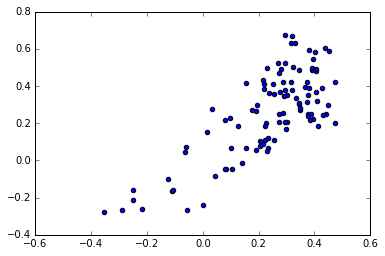

In [68]:
plt.scatter(bc['opg'].values[0:-1],bo['g'])